# Exploratory data analysis (EDA)

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [10]:
df = pd.read_csv('../input/train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as `Alley` and `PoolQC`). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove `Id` and the features with > 30% NaN` values.

<font color='chocolate'> Note: The reason for Nan values is the absence of that particular feature in the house

In [12]:
#Take only those columns that have < 30% null values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']#Deleting id column

print("List of dropped columns:")
for c in df.columns:
    if c not in df2.columns:
        print(str(c)+", ")
print('\n')
df = df2

List of dropped columns:
Id, 
Alley, 
PoolQC, 
Fence, 
MiscFeature, 




Now lets take a look at how the housing price is distributed

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


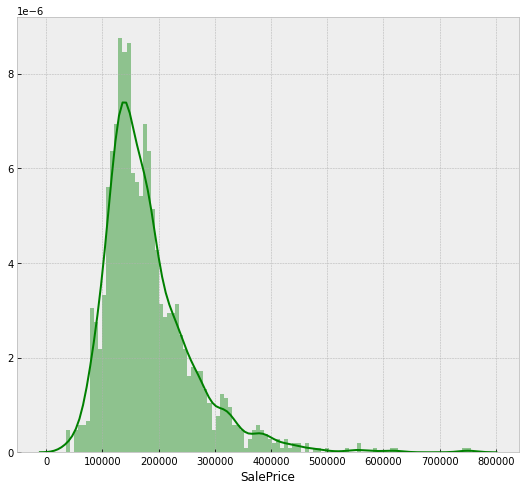

In [13]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))#Setting the graph size
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

<font color='chocolate'>With this information we can see that the prices are skewed right and some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`SalePrice`) for machine learning.</font>

## Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them. To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [16]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [14]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

Seperating numerical features

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
print(df_num.head())

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0     

Now lets plot them all:

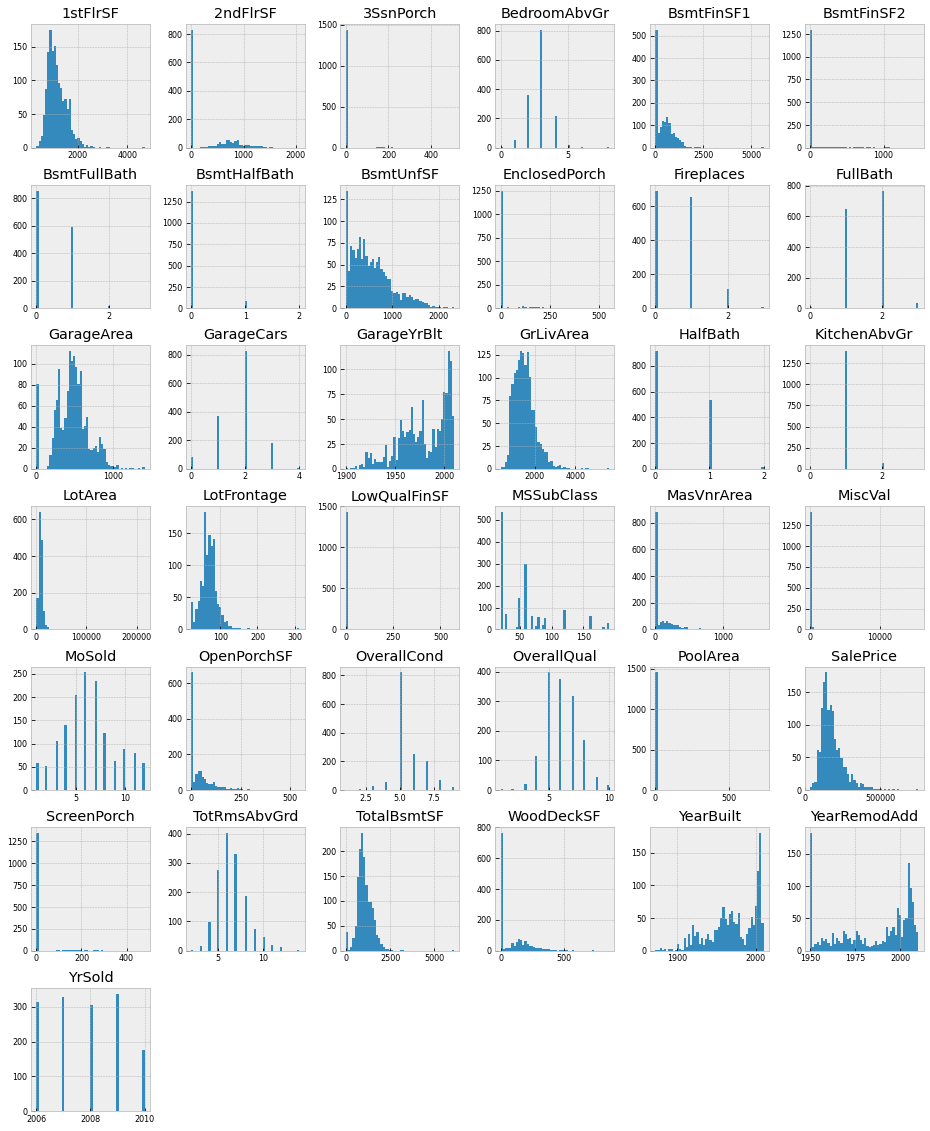

In [21]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
# ';' avoids having the matplotlib verbose informations

<font color='red'>Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` share approximately similar distribution to the one we have with `SalePrice'.</font>

#### Finding Correlation
Correlation helps us to find out which features have a greater impact on 'SalePrice'

In [30]:
print(df_num['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [29]:
print(df_num['SalePrice'][:-1])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1459, dtype: int64


In [31]:
print(df_num.corr()['SalePrice'][:-1])

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64


In [24]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 to ignore the SalePrice column
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)#Descending sort
print("{} features are strongly correlated with SalePrice. They are:\n{}".format(len(golden_features_list), golden_features_list))

10 features are strongly correlated with SalePrice. They are:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


We have now a list of correlated values but they might be effected with outliers. Two ways to deal with outlier can be:

- Plot the numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers
    
Correlation by itself does not always explain the relationship between data. Visualizing it could lead us to new insights.


In [34]:
for i in range(0, len(df_num.columns), 5):
    print(df_num.columns[i:i+5])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'], dtype='object')
Index(['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'], dtype='object')
Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], dtype='object')
Index(['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], dtype='object')
Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt'],
      dtype='object')
Index(['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')
Index(['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold'], dtype='object')
Index(['YrSold', 'SalePrice'], dtype='object')


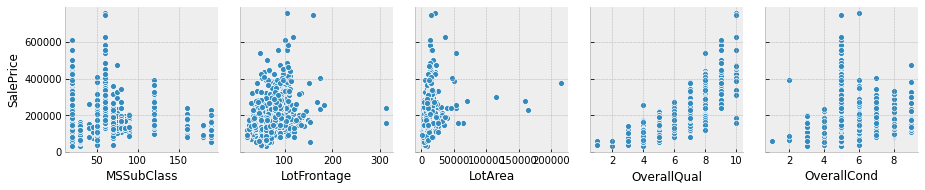

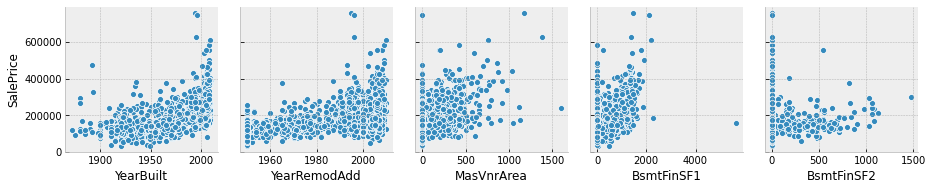

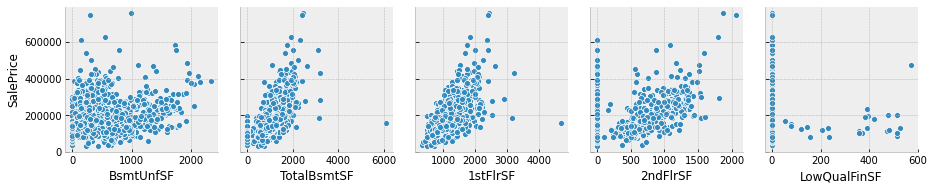

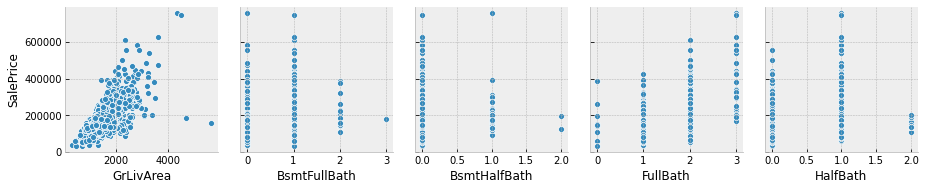

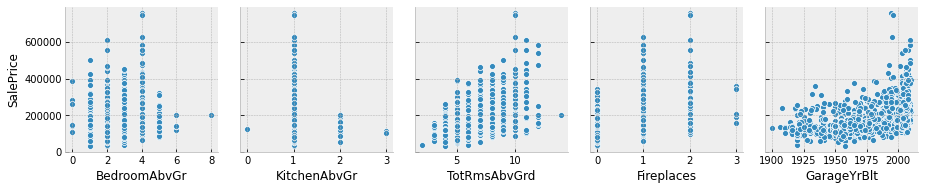

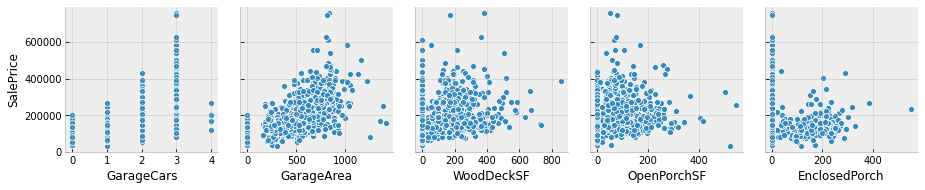

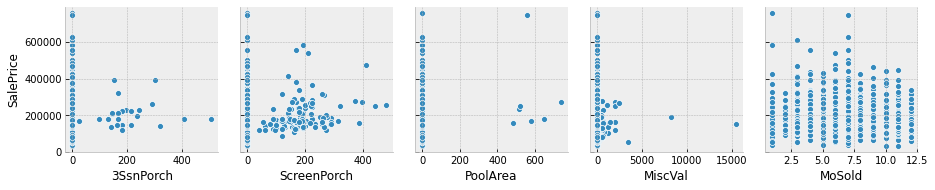

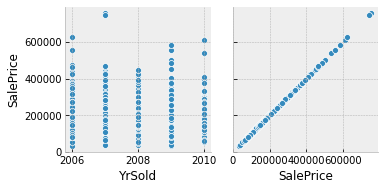

In [41]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],#Plotting multiple graphs at one line
                y_vars=['SalePrice'])

1. Most of them seems to have a linear relationship with the `SalePrice` 
2. If we look closely at the data we can see that a lot of data points are located on `x = 0` which may indicate the absence of such feature in the house. So now lets remove these `0` values and repeat the process of finding correlated values: 

In [62]:
print([df_num.columns[1], 'SalePrice'])


['LotFrontage', 'SalePrice']


In [64]:
print(df_num[[df_num.columns[1], 'SalePrice']])

      LotFrontage  SalePrice
0            65.0     208500
1            80.0     181500
2            68.0     223500
3            60.0     140000
4            84.0     250000
...           ...        ...
1455         62.0     175000
1456         85.0     210000
1457         66.0     266500
1458         68.0     142125
1459         75.0     147500

[1460 rows x 2 columns]


In [45]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

Very interesting! We found another strongly correlated value by cleaning up the data a bit. Now our `golden_features_list` var looks like this:

In [46]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("{} features are strongly correlated with SalePrice. They are:\n{}".format(len(golden_features_list), golden_features_list))

11 features are strongly correlated with SalePrice. They are:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


<font color='chocolate'>Later with feature engineering we may add dummy values where value of a given feature > 0 would be 1 representing its presence and 0 would its absence. 

### Conclusion

<font color='chocolate'>By looking at correlation between numerical values we discovered 11 features which have a strong relationship to a house price. Besides correlation we didn't find any notable pattern on the datas which are not correlated.</font>

## Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

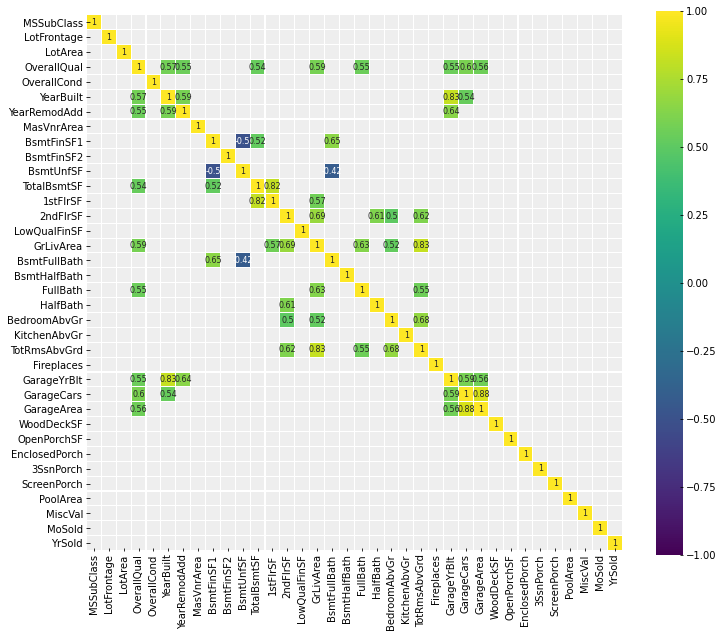

In [47]:
corr = df_num.drop('SalePrice', axis=1).corr() # Finding correlations among columns after dropping saleprice
plt.figure(figsize=(12, 10))#adjusting image size

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<font color='chocolate'>Looking at the high correlation values, we can combine some features also such as (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) to reduce the number of features assuming that both goes together. Such as The greater the garage area the greater the number of cars can be parked there.</font>

## Q -> Q (Quantitative to Quantitative relationship)

Let's now examine the quantitative features of our dataframe and how they relate to the `SalePrice`. Some of the features of our dataset are categorical also and would have to be seperated. Referring to the data description, we have the following list:

In [48]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


Still, we have a lot of features to analyse here so let's take the *strongly correlated quantitative* features from this dataset and analyse them one by one

In [49]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
print(features_to_analyse)

['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


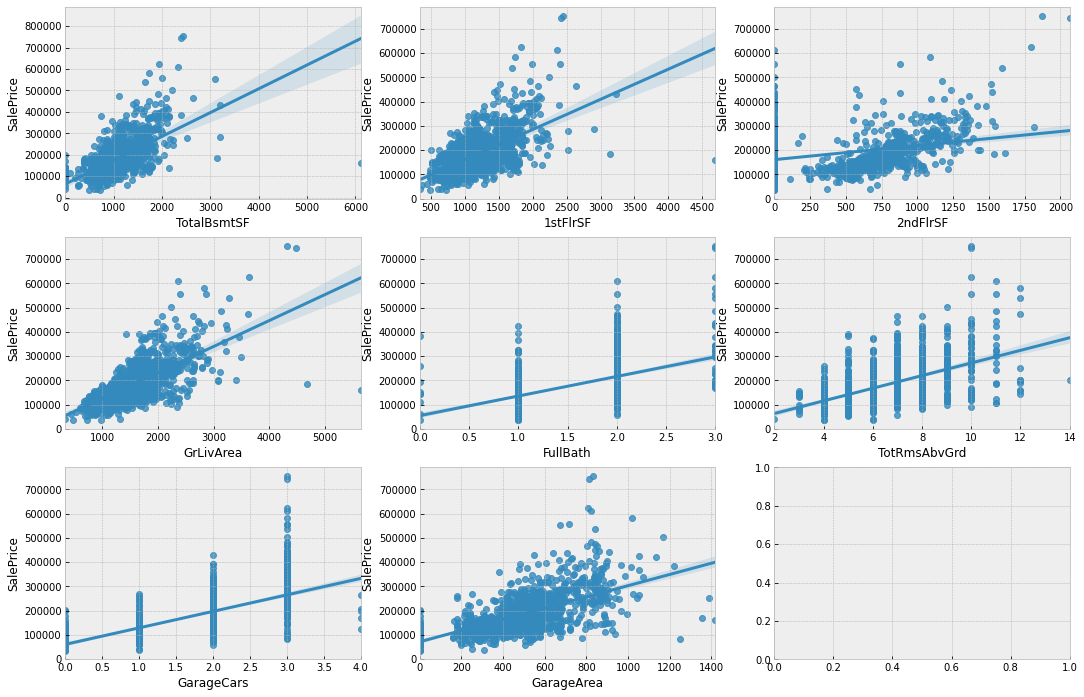

In [50]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

## C -> Q (Categorical to Quantitative relationship)

Exploring the categorical data

In [52]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
print(df_categ.head())

   MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0          60       RL   Pave      Reg         Lvl    AllPub    Inside   
1          20       RL   Pave      Reg         Lvl    AllPub       FR2   
2          60       RL   Pave      IR1         Lvl    AllPub    Inside   
3          70       RL   Pave      IR1         Lvl    AllPub    Corner   
4          60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageYrBlt GarageFinish GarageQual  \
0       Gtl      CollgCr       Norm  ...      2003.0          RFn         TA   
1       Gtl      Veenker      Feedr  ...      1976.0          RFn         TA   
2       Gtl      CollgCr       Norm  ...      2001.0          RFn         TA   
3       Gtl      Crawfor       Norm  ...      1998.0          Unf         TA   
4       Gtl      NoRidge       Norm  ...      2000.0          RFn         TA   

   GarageCond  PavedDrive  MoSold  YrSold SaleType SaleCondition SalePrice

And don't forget the non-numerical features

In [54]:
df_not_num = df_categ.select_dtypes(include = ['O'])#Object type
print('{} features are non numerical:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

39 features are non numerical:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Now lets plot some of them

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

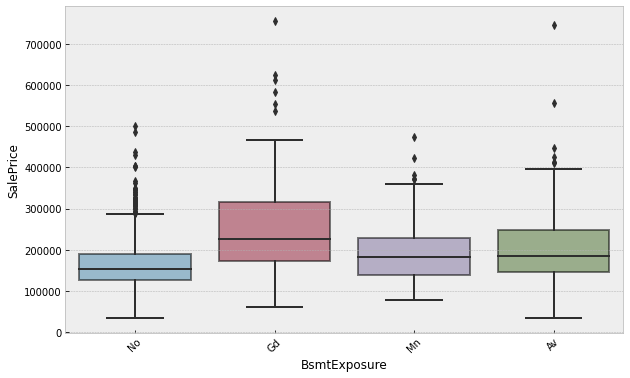

In [55]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

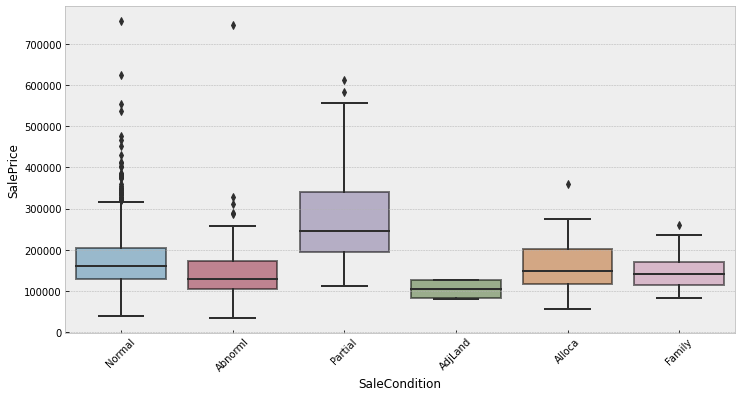

In [56]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

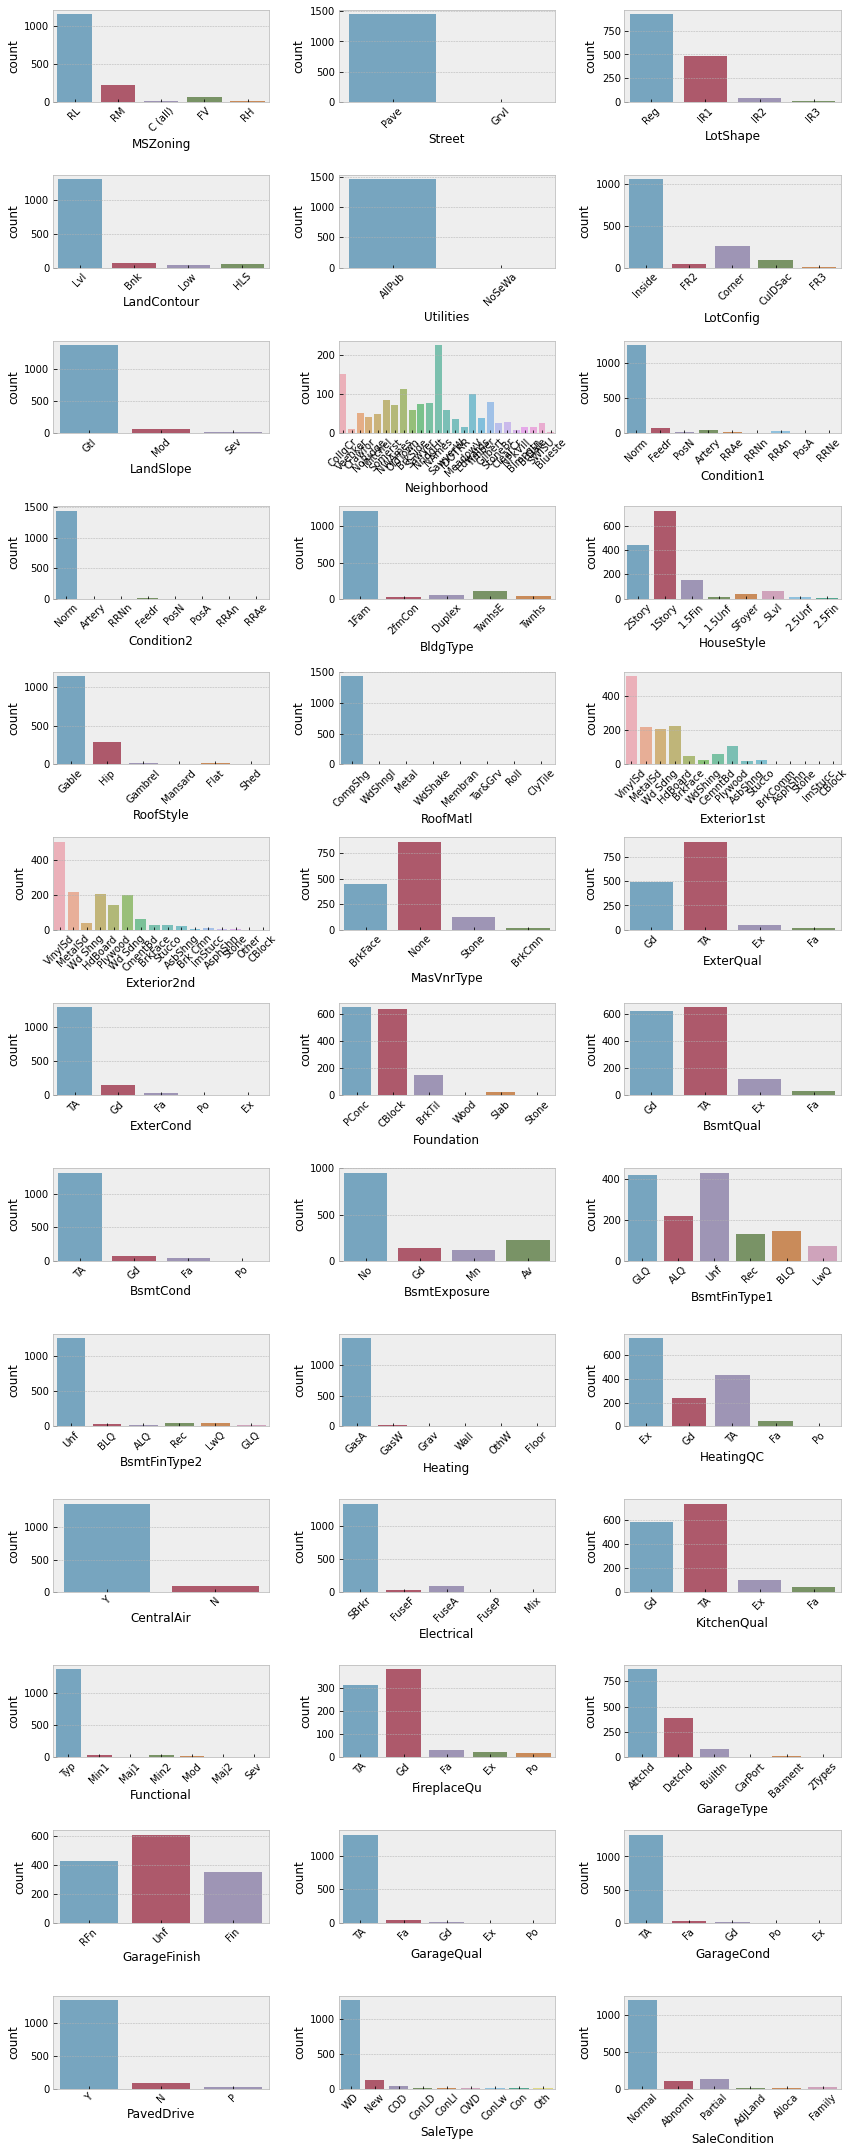

In [57]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

<font color='chocolate'>Some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`.These features might not be relevant for our predictive model</font>

**Reference:**
https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python